In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


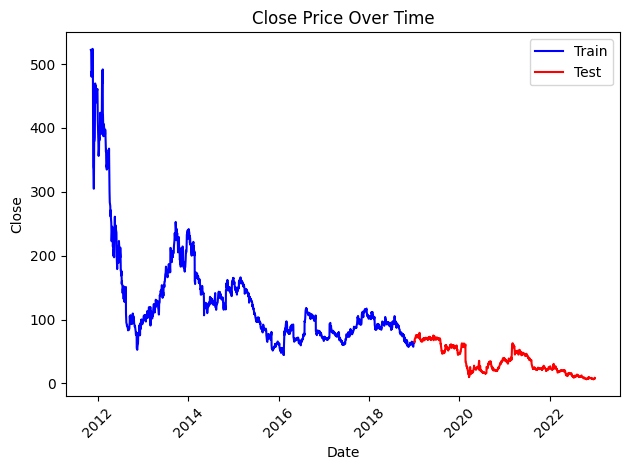

In [2]:
#GROUPON 
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
data = Data('GRPN',start_date,end_date,2019)
data.data_preprocess()

Running ring
GENERATION 0 START
Generation 0: Best fitness = 0.6743014117815284 Average Fitness = 0.22766458515116467
GENERATION 0 END
GENERATION 1 START
Generation 1: Best fitness = 0.6743014117815284 Average Fitness = 0.2980097962535213
GENERATION 1 END
GENERATION 2 START
Generation 2: Best fitness = 0.7394149357672061 Average Fitness = 0.33928336259633923
GENERATION 2 END
GENERATION 3 START
Generation 3: Best fitness = 0.7394149357672061 Average Fitness = 0.3745884096666733
GENERATION 3 END
GENERATION 4 START
Generation 4: Best fitness = 0.7394149357672061 Average Fitness = 0.41467088270386293
GENERATION 4 END
GENERATION 5 START
Generation 5: Best fitness = 0.7394149357672061 Average Fitness = 0.4469028572719611
GENERATION 5 END
GENERATION 6 START
Generation 6: Best fitness = 0.8950557157606669 Average Fitness = 0.4822402766217398
GENERATION 6 END
GENERATION 7 START
Generation 7: Best fitness = 0.8950557157606669 Average Fitness = 0.4935368768002912
GENERATION 7 END
GENERATION 8 STA

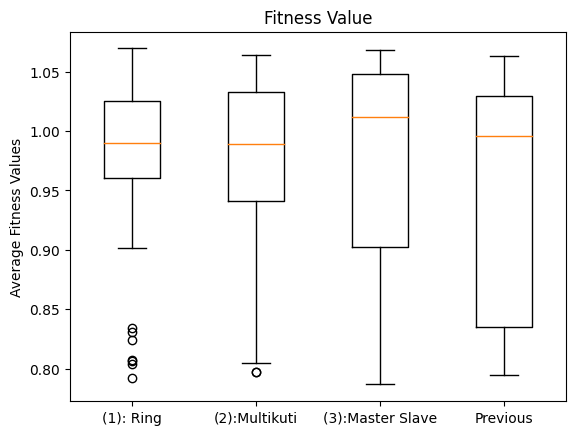

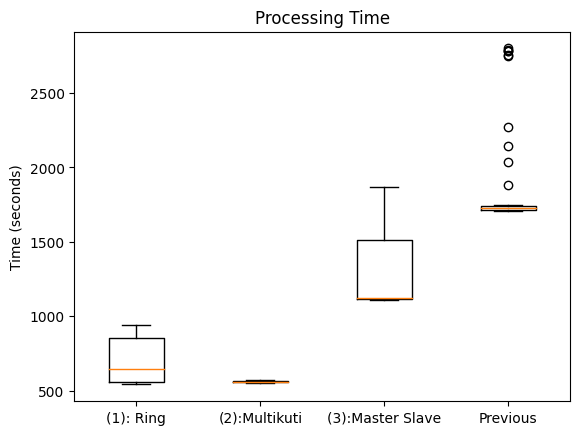

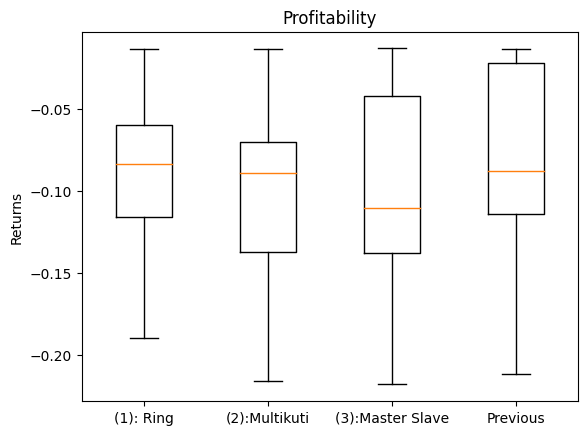

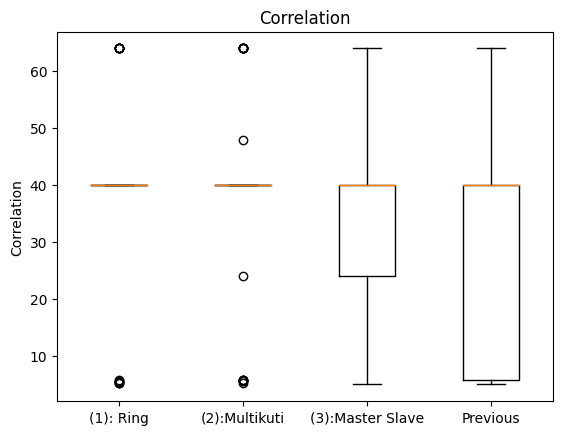

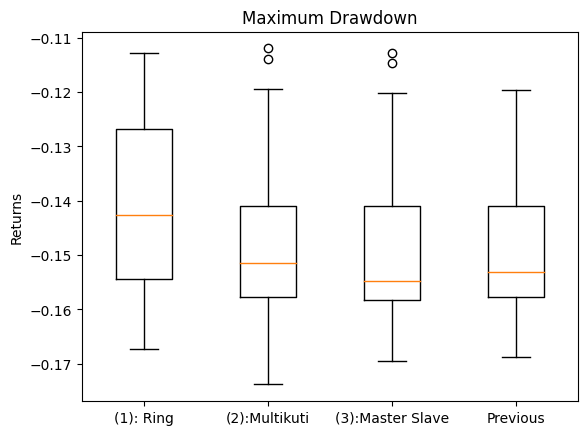

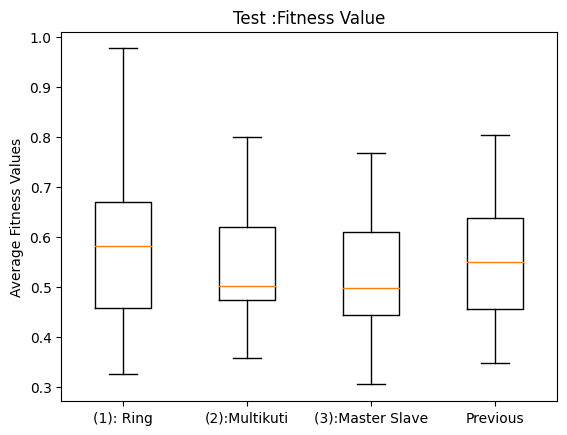

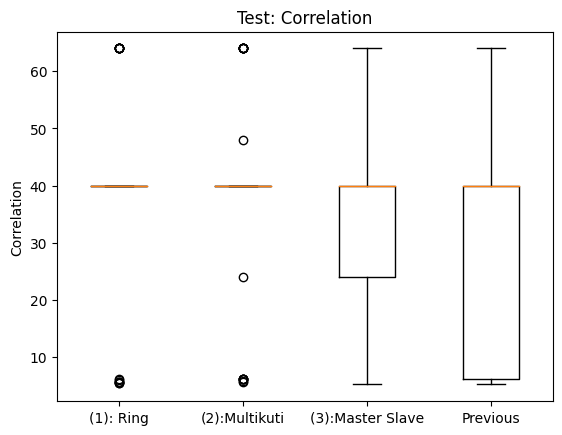

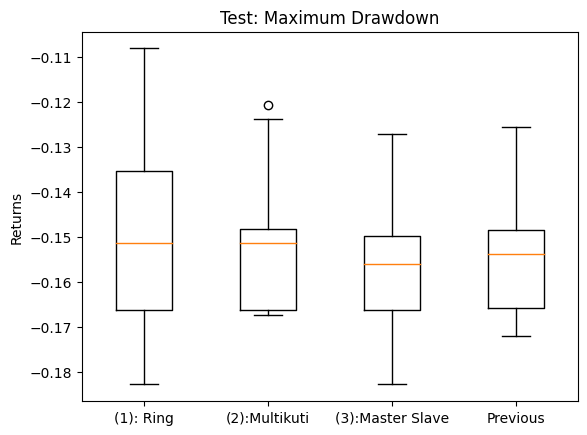

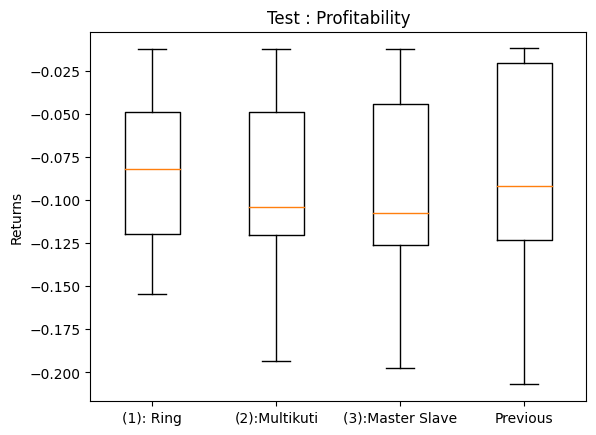

In [28]:
#total return training 
import matplotlib.pyplot as plt

fitness_values = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_fitness_values = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
speed_values =  {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
profit = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_profit = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
risk = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
mdd = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_risk = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_mdd = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
evolve_strategy =["ring", "multikuti","master_slave","gga"]

for i in evolve_strategy:
    for j in range(50):
        start = time.time()
        ga = IslandGGA(data=data.train_data,num_islands=8,m_iter=10,num_iter=50,pSize=200,r_cross=0.4,r_mut=0.1,strategies=data.strategies,evolve_strategy=i)
        ga.evolve()
        end = time.time()
        processing_time=end - start
        speed_values[i].append(processing_time)
        ### USE TRAIN DATA? 
        fitness_values[i].append(ga.globalBest.fitness_value)
        profit[i].append(ga.globalBest.profit)
        risk[i].append(ga.globalBest.corr)
        mdd[i].append(ga.globalBest.mdd)
        ### USE TEST DATA HERE? 
        ga.globalBest.calculate_chromosome_fitness(data.test_data,1)
        test_fitness_values[i].append(ga.globalBest.fitness_value)
        test_profit[i].append(ga.globalBest.profit)
        test_risk[i].append(ga.globalBest.corr)
        test_mdd[i].append(ga.globalBest.mdd)



# Combine the fitness data into a list
fitness_data = [fitness_values[i] for i in  evolve_strategy]

# Create a fitness box plot
fig, ax = plt.subplots()
ax.boxplot(fitness_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Average Fitness Values')

# Set the title of the plot
ax.set_title('Fitness Value')

# Show the plot
plt.show()



#### TIME PLOT
# Combine the time data into a list
speed_data = [speed_values[i] for i in  evolve_strategy]

# Create a time box plot
fig, ax = plt.subplots()
ax.boxplot(speed_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Time (seconds)')

# Set the title of the plot
ax.set_title('Processing Time')

# Show the plot
plt.show()



#### profit
# Combine the profit data into a list
profit_data = [profit[i] for i in  evolve_strategy]

# Create a profit box plot
fig, ax = plt.subplots()
ax.boxplot(profit_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Returns')

# Set the title of the plot
ax.set_title('Profitability')

# Show the plot
plt.show()



#### risk
# Combine the risk data into a list
risk_data = [risk[i] for i in  evolve_strategy]

# Create a risk box plot
fig, ax = plt.subplots()
ax.boxplot(risk_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Correlation')

# Set the title of the plot
ax.set_title('Correlation')

# Show the plot
plt.show()

#### mdd
# Combine the risk data into a list
mdd_data = [mdd[i] for i in  evolve_strategy]

# Create a risk box plot
fig, ax = plt.subplots()
ax.boxplot(mdd_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Returns')

# Set the title of the plot
ax.set_title('Maximum Drawdown')

# Show the plot
plt.show()


# Combine the test fitness data into a list
test_fitness_data = [test_fitness_values[i] for i in  evolve_strategy]
# Create a test fitness box plot
fig, ax = plt.subplots()
ax.boxplot(test_fitness_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Average Fitness Values')

# Set the title of the plot
ax.set_title('Test :Fitness Value')
# Show the plot
plt.show()

#### test risk
# Combine the risk data into a list
test_risk_data = [test_risk[i] for i in  evolve_strategy]

# Create a risk box plot
fig, ax = plt.subplots()
ax.boxplot(test_risk_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Correlation')

# Set the title of the plot
ax.set_title('Test: Correlation')

#### test mdd
# Combine the risk data into a list
test_mdd_data = [test_mdd[i] for i in  evolve_strategy]

# Create a risk box plot
fig, ax = plt.subplots()
ax.boxplot(test_mdd_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Returns')

# Set the title of the plot
ax.set_title('Test: Maximum Drawdown')

#### profit
# Combine the profit data into a list
test_profit_data = [test_profit[i] for i in  evolve_strategy]

# Create a test profit box plot
fig, ax = plt.subplots()
ax.boxplot(test_profit_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Returns')

# Set the title of the plot
ax.set_title('Test : Profitability')

# Show the plot
plt.show()

In [32]:
df = pd.DataFrame(test_fitness_data).T
df.columns = evolve_strategy
df.describe()

,ring,multikuti,master_slave,gga
count,50.000000,50.000000,50.000000,50.000000
mean,0.570732,0.545908,0.526957,0.546308
std,0.149838,0.106310,0.121959,0.124800
min,0.326565,0.359215,0.305363,0.347867
25%,0.458907,0.473320,0.444435,0.456198
50%,0.581411,0.502750,0.498561,0.549323
75%,0.669680,0.619547,0.609832,0.638309
max,0.977135,0.800658,0.768101,0.803527


In [37]:
from scipy import stats

# Compare the  metrics of  two algorithms
t_statistic, p_value = stats.ttest_ind(mdd_data[0], mdd_data[3])

# Print the results
if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference  is not statistically significant.")
print(p_value)

The difference is statistically significant.
0.005680138654535582


In [32]:
start_price = data.test_data.iloc[0]['close']
end_price = data.test_data.iloc[-1]['close']
total_return = (end_price - start_price) / start_price * 1

print("Buy and Hold Strategy:")
print(f"Start Price: ${start_price:.2f}")
print(f"End Price: ${end_price:.2f}")
print(f"Total Return: {total_return:.2f}")


Buy and Hold Strategy:
Start Price: $65.20
End Price: $8.58
Total Return: -0.87
